In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style = "dark", 
        color_codes = True,
        font_scale = 1.5)
plt.style.use('fivethirtyeight')


# Data Exploration

- Load dataset
- Clean data and remove nulls
- Plot correlation
- Plot other variables

In [2]:
URL = "../data/raw/steam/steam.csv"
games_original = pd.read_csv(URL, encoding='UTF-8')
games = games_original

In [3]:
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [4]:
games.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [5]:
games["price"].unique().sum()

5041.82

d:\Users\yehon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of games by price')

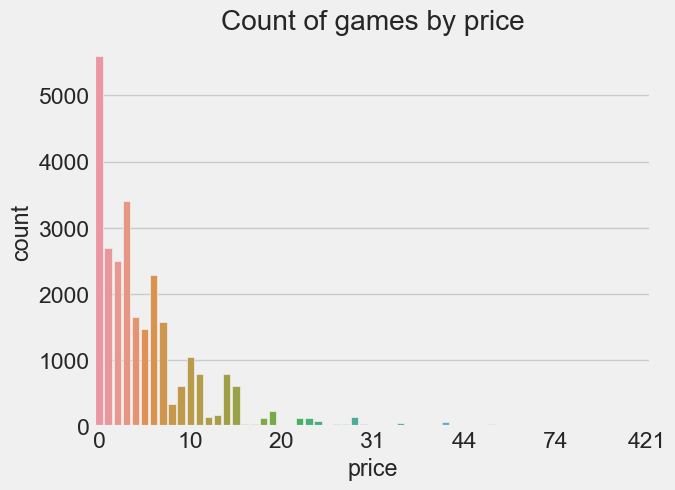

In [6]:
sns.set_color_codes()
fig = plt.figure()

data = games
plot_ = sns.countplot(data['price'].apply(int))

fig.canvas.draw()
new_ticks = [i.get_text() for i in plot_.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
plot_.set_title("Count of games by price")


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='price', ylabel='median_playtime'>

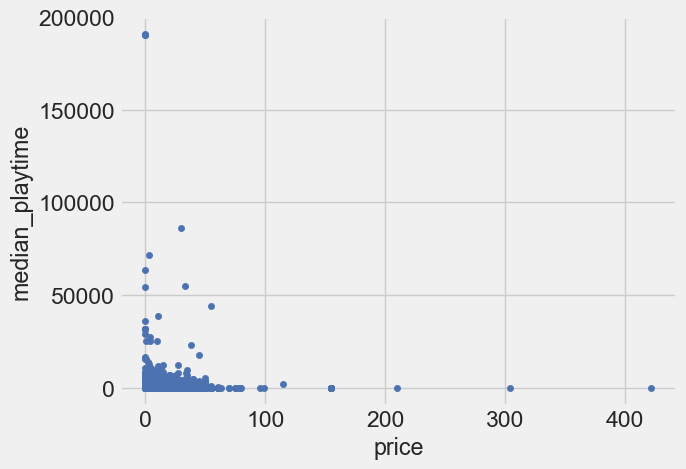

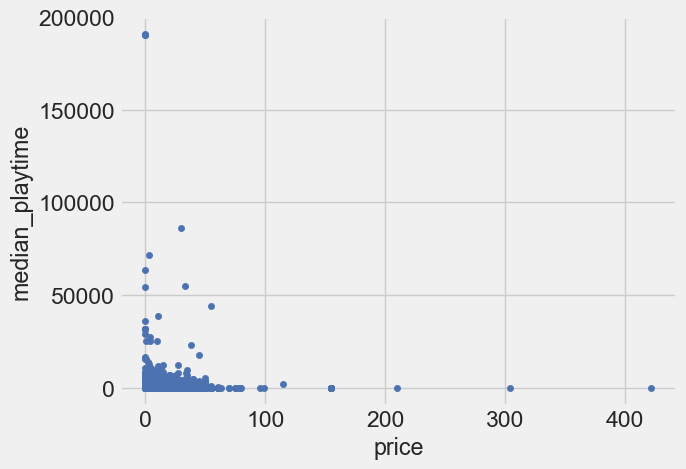

In [7]:
sns.set_color_codes()
games.plot(x="price", y="median_playtime", kind="scatter")
games.plot(x="price", y="median_playtime", kind="scatter")

In [8]:
games_english = games
games_english.name.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
games_english.developer.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
games_english.publisher.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
games_english = games_english.dropna()
#games_english = games_english.fillna(0).astype(int)
games_english.head(100)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3500,Mystery P.I. - The Lottery Ticket,2007-10-16,1,SpinTop Games,"PopCap Games, Inc.",windows,0,Single-player,Casual,Casual;Hidden Object,0,10,3,0,0,20000-50000,4.25
96,3510,Amazing Adventures The Lost Tomb,2007-12-13,1,SpinTop Games,"PopCap Games, Inc.",windows,0,Single-player,Casual,Casual;Hidden Object;Puzzle,0,21,8,0,0,20000-50000,4.25
97,3520,Mystery P.I. - The Vegas Heist,2008-06-05,1,SpinTop Games,"PopCap Games, Inc.",windows,0,Single-player,Casual,Casual;Hidden Object,0,11,5,0,0,20000-50000,4.25
98,3530,Amazing Adventures Around the World,2009-04-15,1,SpinTop Games,"PopCap Games, Inc.",windows,0,Single-player,Casual,Casual;Hidden Object;Puzzle,0,23,7,0,0,20000-50000,4.25


In [9]:
games_english['release_date'] = pd.to_datetime(games_english['release_date'])
games_english = games_english.loc[games_english['release_date'] >= '2013-01-01']
games_english.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
22,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,863507,142079,23944,801,100000000-200000000,0.00
77,2870,X Rebirth,2013-11-15,1,Egosoft,Egosoft,windows;mac;linux,0,Single-player;Steam Achievements;Full controll...,Action;Simulation,Space;Simulation;Sci-fi,69,2832,4032,1744,3386,200000-500000,24.99
219,8870,BioShock Infinite,2013-03-25,1,Irrational Games;Aspyr (Mac);Virtual Programmi...,2K;Aspyr (Mac),windows;mac;linux,18,Single-player;Steam Achievements;Full controll...,Action,FPS;Story Rich;Action,80,79442,3846,614,519,2000000-5000000,19.99
247,9940,Blade Kitten,2014-05-22,1,Krome Studios,Krome Studios,windows,0,Single-player;Steam Achievements;Steam Trading...,Action;Adventure,Anime;Platformer;Female Protagonist,20,746,149,222,360,50000-100000,1.99
264,10270,Disciples III: Reincarnation,2014-02-14,1,Akella,Kalypso Media Digital,windows,0,Single-player;Multi-player,RPG;Strategy,RPG;Turn-Based Strategy;Strategy,0,618,252,889,889,50000-100000,9.99


In [10]:
def rating_ratio(positive_r, negative_r):
    """Return ratio of positive to negative ratings"""
    total = positive_r + negative_r
    ratio = positive_r / total
    return ratio

In [11]:
#games_english['ratings_ratio'] = games_english[['positive_ratings', 'negative_ratings']].apply(rating_ratio)
#games_english['ratings_ratio'] = games_english.apply(lambda x: rating_ratio(x['positive_ratings'], x['negative_ratings']), axis=1)
#games_english.head()

In [12]:
temp = games_english.iloc[0:10000]
devs = temp['developer'].str.get_dummies(';')
devs = devs.add_prefix('dev-')
devs.reset_index(drop=True, inplace=True)

pubs = temp['publisher'].str.get_dummies(';')
pubs = pubs.add_prefix('pub-')
pubs.reset_index(drop=True, inplace=True)

plats = temp['platforms'].str.get_dummies(';')
plats = plats.add_prefix('plat-')
plats.reset_index(drop=True, inplace=True)

cats = temp['categories'].str.get_dummies(';')
cats = cats.add_prefix('cat-')
cats.reset_index(drop=True, inplace=True)

genr = temp['genres'].str.get_dummies(';')
genr = genr.add_prefix('genr-')
genr.reset_index(drop=True, inplace=True)

tags = temp['steamspy_tags'].str.get_dummies(';')
tags = tags.add_prefix('tag-')
tags.reset_index(drop=True, inplace=True)

temp = pd.concat([temp, devs, pubs, plats, cats, genr, tags], axis=1, join='inner')
temp.reset_index(drop=True, inplace=True)
temp.head()


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,tag-Warhammer 40K,tag-Web Publishing,tag-Werewolves,tag-Western,tag-Word Game,tag-World War I,tag-World War II,tag-Wrestling,tag-Zombies,tag-e-sports
0,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,...,0,0,0,0,0,0,0,0,0,0
1,2870,X Rebirth,2013-11-15,1,Egosoft,Egosoft,windows;mac;linux,0,Single-player;Steam Achievements;Full controll...,Action;Simulation,...,0,0,0,0,0,0,0,0,0,0
2,8870,BioShock Infinite,2013-03-25,1,Irrational Games;Aspyr (Mac);Virtual Programmi...,2K;Aspyr (Mac),windows;mac;linux,18,Single-player;Steam Achievements;Full controll...,Action,...,0,0,0,0,0,0,0,0,0,0
3,9940,Blade Kitten,2014-05-22,1,Krome Studios,Krome Studios,windows,0,Single-player;Steam Achievements;Steam Trading...,Action;Adventure,...,0,0,0,0,0,0,0,0,0,0
4,10270,Disciples III: Reincarnation,2014-02-14,1,Akella,Kalypso Media Digital,windows,0,Single-player;Multi-player,RPG;Strategy,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# These columns are one-hot encoded now so we dont need them anymore
games_english = temp.drop(['developer', 'publisher', 'platforms', 'categories', 'genres', 'steamspy_tags'], axis=1)
games_english.head()

,appid,name,release_date,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,...,tag-Warhammer 40K,tag-Web Publishing,tag-Werewolves,tag-Western,tag-Word Game,tag-World War I,tag-World War II,tag-Wrestling,tag-Zombies,tag-e-sports
0,570,Dota 2,2013-07-09,1,0,0,863507,142079,23944,801,...,0,0,0,0,0,0,0,0,0,0
1,2870,X Rebirth,2013-11-15,1,0,69,2832,4032,1744,3386,...,0,0,0,0,0,0,0,0,0,0
2,8870,BioShock Infinite,2013-03-25,1,18,80,79442,3846,614,519,...,0,0,0,0,0,0,0,0,0,0
3,9940,Blade Kitten,2014-05-22,1,0,20,746,149,222,360,...,0,0,0,0,0,0,0,0,0,0
4,10270,Disciples III: Reincarnation,2014-02-14,1,0,0,618,252,889,889,...,0,0,0,0,0,0,0,0,0,0


In [14]:
games_english.head()

,appid,name,release_date,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,...,tag-Warhammer 40K,tag-Web Publishing,tag-Werewolves,tag-Western,tag-Word Game,tag-World War I,tag-World War II,tag-Wrestling,tag-Zombies,tag-e-sports
0,570,Dota 2,2013-07-09,1,0,0,863507,142079,23944,801,...,0,0,0,0,0,0,0,0,0,0
1,2870,X Rebirth,2013-11-15,1,0,69,2832,4032,1744,3386,...,0,0,0,0,0,0,0,0,0,0
2,8870,BioShock Infinite,2013-03-25,1,18,80,79442,3846,614,519,...,0,0,0,0,0,0,0,0,0,0
3,9940,Blade Kitten,2014-05-22,1,0,20,746,149,222,360,...,0,0,0,0,0,0,0,0,0,0
4,10270,Disciples III: Reincarnation,2014-02-14,1,0,0,618,252,889,889,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#compression_opts = dict(method='zip',archive_name='out.csv')  
#games_english.to_csv('out.zip', index=False,compression=compression_opts)  

In [25]:
games_english.to_csv('pre_processed.csv', index=False)  

KeyboardInterrupt: 